In [39]:
import pandas as pd

df_train = pd.read_csv('drive/My Drive/Colab Notebooks/Titanic-Pytourch/train.csv')
df_test = pd.read_csv('drive/My Drive/Colab Notebooks/Titanic-Pytourch/test.csv')
df_sub = pd.read_csv('drive/My Drive/Colab Notebooks/Titanic-Pytourch/gender_submission.csv')

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
df_train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop( ['Name','Ticket','Cabin'],axis=1,inplace=True)

sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)
df_train = pd.concat([df_train,sex,embark],axis=1)

df_train.drop(['Sex','Embarked'],axis=1,inplace=True)

sex = pd.get_dummies(df_test['Sex'],drop_first=True)
embark = pd.get_dummies(df_test['Embarked'],drop_first=True)
df_test = pd.concat([df_test,sex,embark],axis=1)

df_test.drop(['Sex','Embarked'],axis=1,inplace=True)

df_train.fillna(df_train.mean(),inplace=True)
df_test.fillna(df_test.mean(),inplace=True)

Scaler1 = StandardScaler()
Scaler2 = StandardScaler()

train_columns = df_train.columns
test_columns  = df_test.columns

df_train = pd.DataFrame(Scaler1.fit_transform(df_train))
df_test  = pd.DataFrame(Scaler2.fit_transform(df_test))

df_train.columns = train_columns
df_test.columns  = test_columns

features = df_train.iloc[:,2:].columns.tolist()
target   = df_train.loc[:, 'Survived'].name

X_train = df_train.iloc[:,2:].values
y_train = df_train.loc[:, 'Survived'].values

In [70]:
train_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [71]:
test_columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [74]:
X_train

array([[ 0.82737724, -0.5924806 ,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.63878901,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.17706291, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.61470971]])

***PYTORCH***

In [43]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable

In [44]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(8, 190)
        self.fc2 = nn.Linear(190, 2)       
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.fc1(x)      
        x = self.dropout(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=8, out_features=190, bias=True)
  (fc2): Linear(in_features=190, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [45]:
criterion = nn.CrossEntropyLoss()

In [46]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [47]:
batch_size = 64
n_epochs = 50
batch_no = len(X_train) // batch_size


for epoch in range(n_epochs):
  if epoch % 5 ==0: 
    print("Epoch {}".format(epoch+1))
  x_train, y_train = shuffle(x_train,y_train)
  # Mini Batch Learning

  for i in range(batch_no):
    start = i * batch_size  
    end = start + batch_size 

    x_var = Variable(torch.FloatTensor(x_train[start:end]))
    y_var = Variable(torch.FloatTensor(y_train[start:end]))
    y_var = y_var.type(torch.LongTensor)

    optimizer.zero_grad()
    ypred_var=model(x_var)
    loss = criterion(ypred_var , y_var)
    loss.backward()
    optimizer.step()

Epoch 1
Epoch 6
Epoch 11


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 16
Epoch 21
Epoch 26
Epoch 31
Epoch 36
Epoch 41
Epoch 46


In [59]:
test_var = Variable(torch.FloatTensor(x_val) , requires_grad = True)
with torch.no_grad():
  result = model(test_var)
values, labels = torch.max(result,1)
y_val = 0 < y_val
num_right = np.sum(labels.data.numpy() == y_val) 
print('Accuracy {:.2f}'.format(num_right / len(y_val)))

Accuracy 0.81


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [60]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

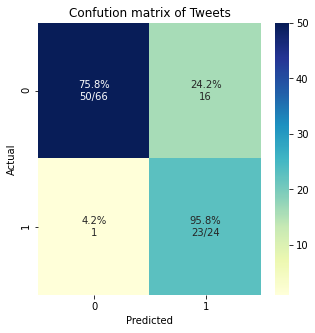

In [64]:
plot_cm(labels,y_val, 'Confution matrix of Tweets', figsize=(5,5))